In [276]:
import pandas as pd
from prophet import Prophet
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [277]:
df = pd.read_csv('../data/global_weather.csv')


In [278]:
xgb_df = df[df['location_name'] == 'Kuwait City'].copy()
xgb_df = xgb_df.sort_values('last_updated')
xgb_df['last_updated'] = pd.to_datetime(xgb_df['last_updated'])
xgb_df['year'] = xgb_df['last_updated'].dt.year
xgb_df['month'] = xgb_df['last_updated'].dt.month
xgb_df['day'] = xgb_df['last_updated'].dt.day
xgb_df['weekday'] = xgb_df['last_updated'].dt.weekday
xgb_df['hour'] = xgb_df['last_updated'].dt.hour

In [279]:
features = ['year', 'month', 'day', 'weekday', 'hour']
target = 'temperature_celsius'

X = xgb_df[features]
y = xgb_df[target]

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [281]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [282]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [283]:
y_pred = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'XGBoost MAE: {mae:.2f}')

XGBoost MAE: 2.64


In [284]:
import pandas as pd

df = pd.read_csv('../data/global_weather.csv')

# Preview
df.head()


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [285]:
pip install pandas 

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [286]:
import pandas as pd

df = pd.read_csv('../data/global_weather.csv')
print("Shape:", df.shape)
df.head()

Shape: (60218, 41)


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [287]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [288]:
df['last_updated'] = pd.to_datetime(df['last_updated'])
df['last_updated'].head()

0   2024-05-16 13:15:00
1   2024-05-16 10:45:00
2   2024-05-16 09:45:00
3   2024-05-16 10:45:00
4   2024-05-16 09:45:00
Name: last_updated, dtype: datetime64[ns]

In [289]:
df = df.drop(columns=['last_updated_epoch', 'temperature_fahrenheit'])

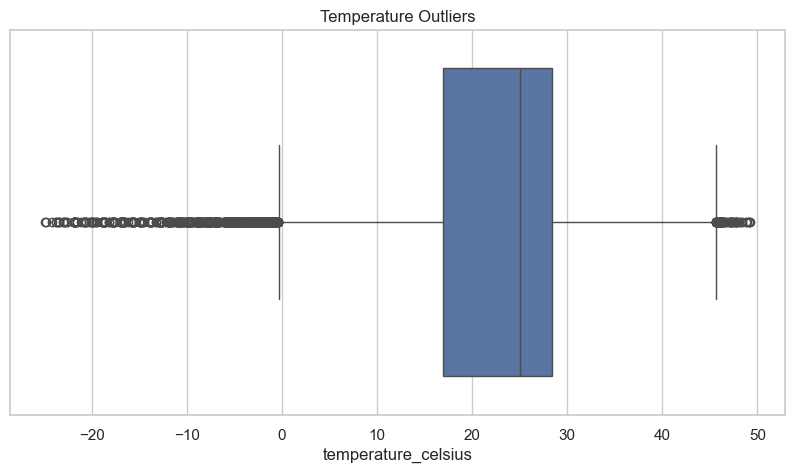

In [290]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['temperature_celsius'])
plt.title("Temperature Outliers")
plt.show()

In [291]:
pip install matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


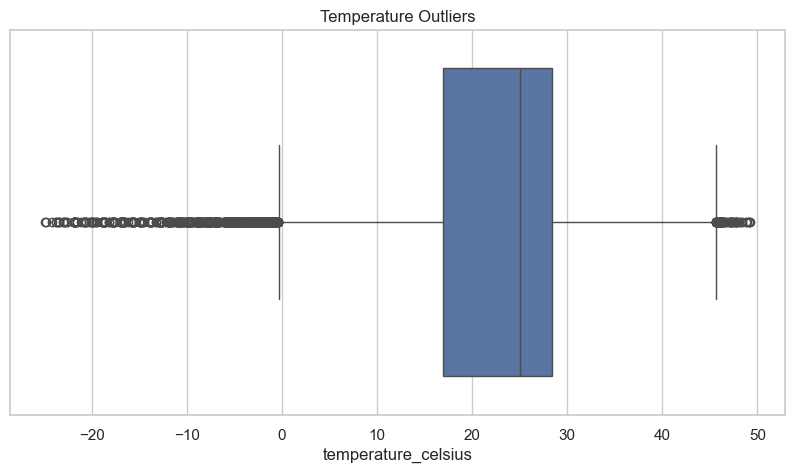

In [292]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['temperature_celsius'])
plt.title("Temperature Outliers")
plt.show()

In [293]:
Q1 = df['temperature_celsius'].quantile(0.25)
Q3 = df['temperature_celsius'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['temperature_celsius'] < lower_bound) | (df['temperature_celsius'] > upper_bound)]

print(f"Number of outlier rows: {len(outliers)}")
outliers[['country', 'location_name', 'temperature_celsius', 'last_updated']].head(10)


Number of outlier rows: 1350


,country,location_name,temperature_celsius,last_updated
784,Australia,Canberra,-1.0,2024-05-20 00:00:00
3205,Kuwait,Kuwait City,45.7,2024-05-31 17:15:00
4373,Kuwait,Kuwait City,45.9,2024-06-06 17:00:00
4568,Kuwait,Kuwait City,46.6,2024-06-07 17:00:00
5461,Australia,Canberra,-1.9,2024-06-13 00:15:00
5594,Qatar,Doha,46.2,2024-06-12 17:15:00
6313,Iraq,Baghdad,46.6,2024-06-16 16:45:00
6436,Australia,Canberra,-0.6,2024-06-18 00:00:00
6506,Iraq,Baghdad,46.7,2024-06-17 17:00:00
6516,Kuwait,Kuwait City,46.1,2024-06-17 17:00:00


In [294]:
df['is_temp_outlier'] = ((df['temperature_celsius'] < lower_bound) | 
                         (df['temperature_celsius'] > upper_bound)).astype(int)

df['is_temp_outlier'].value_counts()

is_temp_outlier
0    58868
1     1350
Name: count, dtype: int64

In [295]:
city_df = df[df['location_name'] == 'Kuwait City'].copy()


In [296]:
city_df = city_df.sort_values(by='last_updated')


In [297]:
city_df_daily = city_df.set_index('last_updated').resample('D').mean(numeric_only=True).reset_index()


In [298]:
city_df_daily[['last_updated', 'temperature_celsius']].head()


,last_updated,temperature_celsius
0,2024-05-16,29.7
1,2024-05-17,34.8
2,2024-05-18,36.1
3,2024-05-19,39.2
4,2024-05-20,37.6


In [299]:
pip install prophet


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [300]:
from prophet import Prophet

In [301]:
kuwait_df = city_df_daily[['last_updated', 'temperature_celsius']].rename(columns={
    'last_updated': 'ds',
    'temperature_celsius': 'y'
})

kuwait_df.head()

,ds,y
0,2024-05-16,29.7
1,2024-05-17,34.8
2,2024-05-18,36.1
3,2024-05-19,39.2
4,2024-05-20,37.6


In [302]:
model = Prophet()

In [303]:
model.fit(kuwait_df)

15:06:42 - cmdstanpy - INFO - Chain [1] start processing
15:06:42 - cmdstanpy - INFO - Chain [1] done processing


In [304]:
future = model.make_future_dataframe(periods=30)

forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
336,2025-04-17,20.794102,16.989702,24.698279
337,2025-04-18,21.487474,17.757599,25.181576
338,2025-04-19,20.888349,17.347364,24.826552
339,2025-04-20,20.621549,17.069915,24.565546
340,2025-04-21,20.832877,17.162808,24.535516


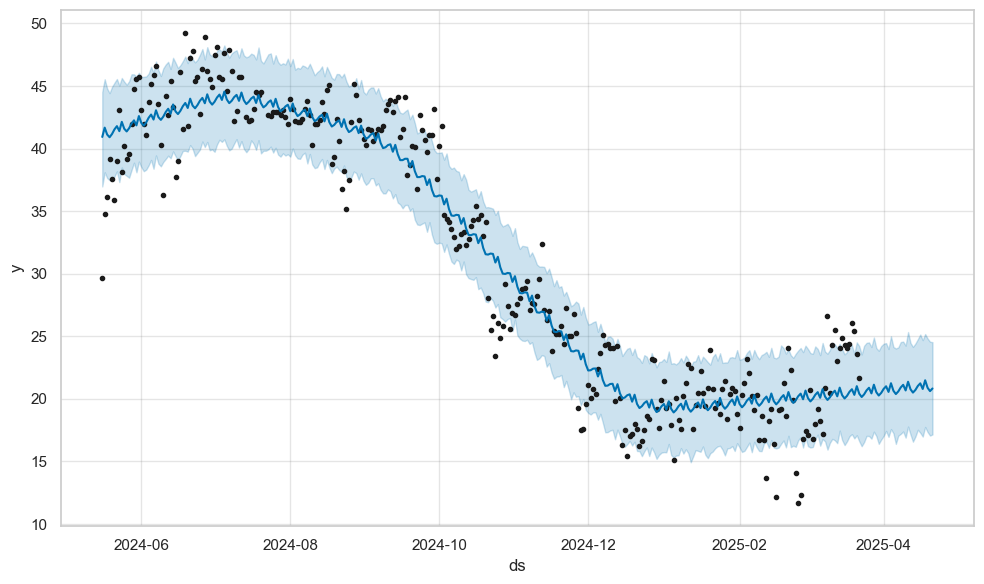

In [305]:
fig1 = model.plot(forecast)

In [306]:
xgb_df = df[df['location_name'] == 'Kuwait City'].copy()

In [307]:
xgb_df['last_updated'] = pd.to_datetime(xgb_df['last_updated'])

In [308]:
xgb_df = xgb_df.sort_values('last_updated')

In [309]:
xgb_df['year'] = xgb_df['last_updated'].dt.year
xgb_df['month'] = xgb_df['last_updated'].dt.month
xgb_df['day'] = xgb_df['last_updated'].dt.day
xgb_df['weekday'] = xgb_df['last_updated'].dt.weekday
xgb_df['hour'] = xgb_df['last_updated'].dt.hour

In [310]:
features = ['year', 'month', 'day', 'weekday', 'hour']
target = 'temperature_celsius'

X = xgb_df[features]
y = xgb_df[target]

In [311]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # time-aware
)

In [312]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [313]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [314]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [315]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1)

xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [316]:
from sklearn.metrics import mean_absolute_error

y_pred = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'XGBoost MAE: {mae:.2f}')

XGBoost MAE: 2.64


In [317]:
xgb_df = df[df['location_name'] == 'Kuwait City'].copy()

In [318]:
xgb_df = xgb_df.sort_values('last_updated')
xgb_df['last_updated'] = pd.to_datetime(xgb_df['last_updated'])

In [319]:
xgb_df['year'] = xgb_df['last_updated'].dt.year
xgb_df['month'] = xgb_df['last_updated'].dt.month
xgb_df['day'] = xgb_df['last_updated'].dt.day
xgb_df['weekday'] = xgb_df['last_updated'].dt.weekday
xgb_df['hour'] = xgb_df['last_updated'].dt.hour

In [320]:
features = ['year', 'month', 'day', 'weekday', 'hour']
target = 'temperature_celsius'

X = xgb_df[features]
y = xgb_df[target]

In [321]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [322]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [323]:
from sklearn.metrics import mean_absolute_error

y_pred = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f"XGBoost MAE: {mae:.2f}")

XGBoost MAE: 2.64


In [324]:
k_df = df[df['location_name'] == 'Kuwait City'].copy()
k_df = k_df.sort_values('last_updated')
k_df['last_updated'] = pd.to_datetime(k_df['last_updated'])

k_df = k_df.rename(columns={'last_updated': 'ds', 'temperature_celsius': 'y'})

In [325]:
from prophet import Prophet


In [326]:
k_df = df[df['location_name'] == 'Kuwait City'].copy()
k_df['last_updated'] = pd.to_datetime(k_df['last_updated'])
k_df = k_df.sort_values('last_updated')
k_df = k_df.rename(columns={'last_updated': 'ds', 'temperature_celsius': 'y'})

model = Prophet()
model.fit(k_df)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

15:06:44 - cmdstanpy - INFO - Chain [1] start processing


15:06:44 - cmdstanpy - INFO - Chain [1] done processing


In [327]:
forecast_filtered = forecast[forecast['ds'].isin(k_df['ds'])]


In [328]:
forecast_filtered = forecast_filtered.reset_index(drop=True)
actual = k_df['y'].reset_index(drop=True)

In [329]:
from sklearn.metrics import mean_absolute_error
prophet_mae = mean_absolute_error(actual, forecast_filtered['yhat'])
print(f"Prophet MAE: {prophet_mae:.2f}")

Prophet MAE: 2.21


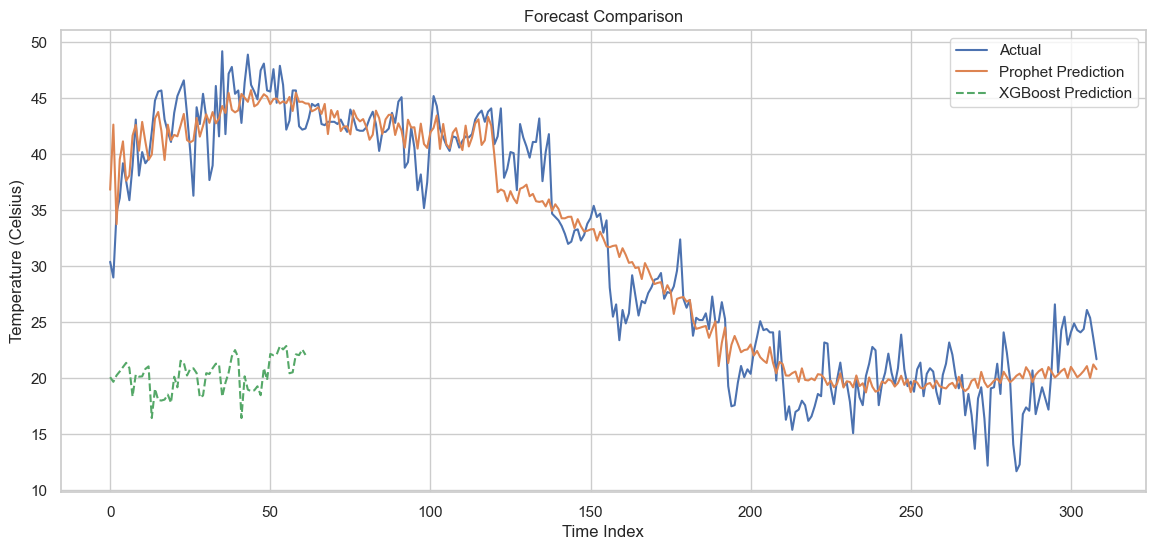

In [330]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(actual.values, label='Actual')
plt.plot(forecast_filtered['yhat'].values, label='Prophet Prediction')
plt.plot(y_pred[:len(actual)], label='XGBoost Prediction', linestyle='--')
plt.legend()
plt.title("Forecast Comparison")
plt.xlabel("Time Index")
plt.ylabel("Temperature (Celsius)")
plt.show()


In [331]:
print("02_modeling_and_evaluation.ipynb")


02_modeling_and_evaluation.ipynb


In [332]:
import pandas as pd

df = pd.read_csv('../data/global_weather.csv')

# Preview
df.head()


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [333]:
pip install pandas 

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [334]:
import pandas as pd

df = pd.read_csv('../data/global_weather.csv')
print("Shape:", df.shape)
df.head()

Shape: (60218, 41)


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [335]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [336]:
df['last_updated'] = pd.to_datetime(df['last_updated'])
df['last_updated'].head()

0   2024-05-16 13:15:00
1   2024-05-16 10:45:00
2   2024-05-16 09:45:00
3   2024-05-16 10:45:00
4   2024-05-16 09:45:00
Name: last_updated, dtype: datetime64[ns]

In [337]:
df = df.drop(columns=['last_updated_epoch', 'temperature_fahrenheit'])

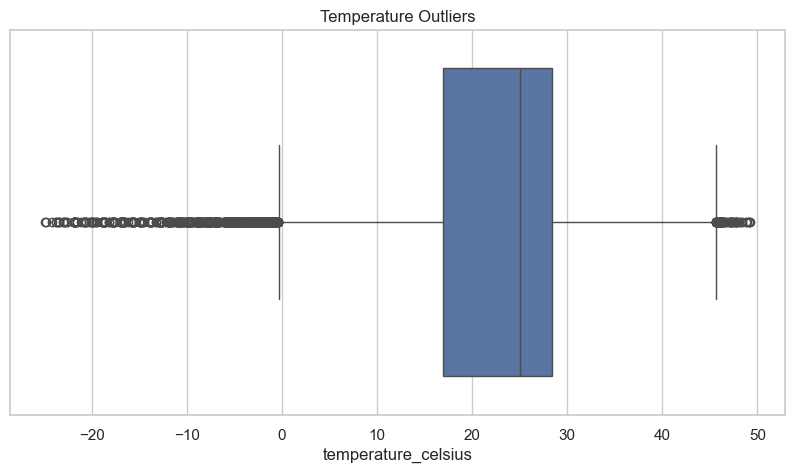

In [338]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['temperature_celsius'])
plt.title("Temperature Outliers")
plt.show()

In [339]:
pip install matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


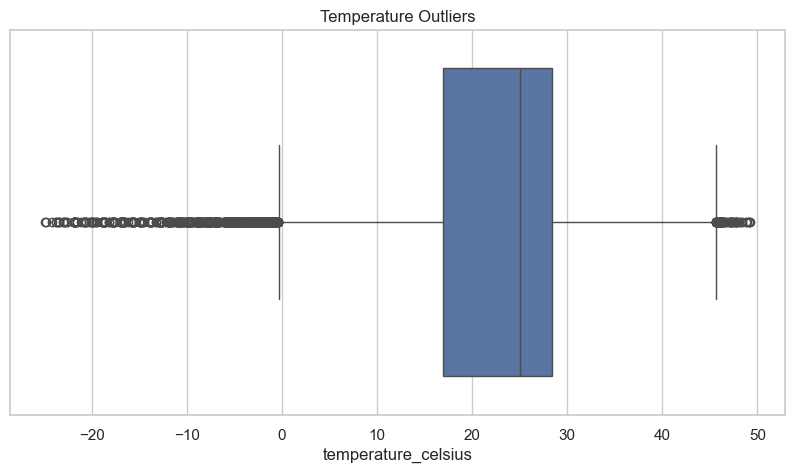

In [340]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['temperature_celsius'])
plt.title("Temperature Outliers")
plt.show()

In [341]:
Q1 = df['temperature_celsius'].quantile(0.25)
Q3 = df['temperature_celsius'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['temperature_celsius'] < lower_bound) | (df['temperature_celsius'] > upper_bound)]

print(f"Number of outlier rows: {len(outliers)}")
outliers[['country', 'location_name', 'temperature_celsius', 'last_updated']].head(10)


Number of outlier rows: 1350


,country,location_name,temperature_celsius,last_updated
784,Australia,Canberra,-1.0,2024-05-20 00:00:00
3205,Kuwait,Kuwait City,45.7,2024-05-31 17:15:00
4373,Kuwait,Kuwait City,45.9,2024-06-06 17:00:00
4568,Kuwait,Kuwait City,46.6,2024-06-07 17:00:00
5461,Australia,Canberra,-1.9,2024-06-13 00:15:00
5594,Qatar,Doha,46.2,2024-06-12 17:15:00
6313,Iraq,Baghdad,46.6,2024-06-16 16:45:00
6436,Australia,Canberra,-0.6,2024-06-18 00:00:00
6506,Iraq,Baghdad,46.7,2024-06-17 17:00:00
6516,Kuwait,Kuwait City,46.1,2024-06-17 17:00:00


In [342]:
df['is_temp_outlier'] = ((df['temperature_celsius'] < lower_bound) | 
                         (df['temperature_celsius'] > upper_bound)).astype(int)

df['is_temp_outlier'].value_counts()

is_temp_outlier
0    58868
1     1350
Name: count, dtype: int64

In [343]:
city_df = df[df['location_name'] == 'Kuwait City'].copy()


In [344]:
city_df = city_df.sort_values(by='last_updated')


In [345]:
city_df_daily = city_df.set_index('last_updated').resample('D').mean(numeric_only=True).reset_index()


In [346]:
city_df_daily[['last_updated', 'temperature_celsius']].head()


,last_updated,temperature_celsius
0,2024-05-16,29.7
1,2024-05-17,34.8
2,2024-05-18,36.1
3,2024-05-19,39.2
4,2024-05-20,37.6


In [347]:
pip install prophet


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [348]:
from prophet import Prophet

In [349]:
kuwait_df = city_df_daily[['last_updated', 'temperature_celsius']].rename(columns={
    'last_updated': 'ds',
    'temperature_celsius': 'y'
})

kuwait_df.head()

,ds,y
0,2024-05-16,29.7
1,2024-05-17,34.8
2,2024-05-18,36.1
3,2024-05-19,39.2
4,2024-05-20,37.6


In [350]:
model = Prophet()

In [351]:
model.fit(kuwait_df)

15:06:46 - cmdstanpy - INFO - Chain [1] start processing
15:06:46 - cmdstanpy - INFO - Chain [1] done processing


In [352]:
future = model.make_future_dataframe(periods=30)

forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
336,2025-04-17,20.794102,17.313873,24.771286
337,2025-04-18,21.487474,17.755679,25.345525
338,2025-04-19,20.888349,17.306107,24.691591
339,2025-04-20,20.621549,16.970094,24.283592
340,2025-04-21,20.832877,17.058057,24.568101


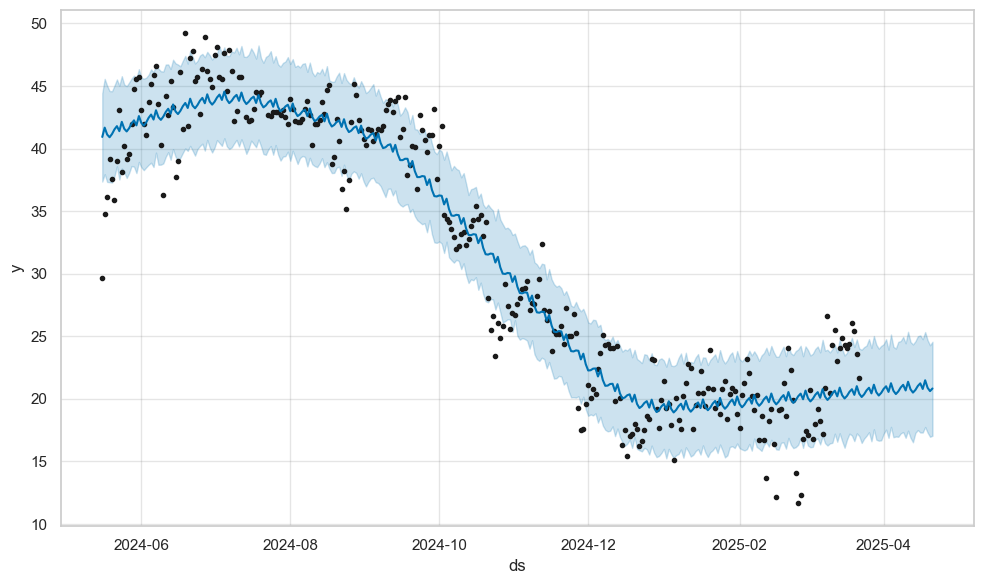

In [353]:
fig1 = model.plot(forecast)

In [354]:
xgb_df = df[df['location_name'] == 'Kuwait City'].copy()

In [355]:
xgb_df['last_updated'] = pd.to_datetime(xgb_df['last_updated'])

In [356]:
xgb_df = xgb_df.sort_values('last_updated')

In [357]:
xgb_df['year'] = xgb_df['last_updated'].dt.year
xgb_df['month'] = xgb_df['last_updated'].dt.month
xgb_df['day'] = xgb_df['last_updated'].dt.day
xgb_df['weekday'] = xgb_df['last_updated'].dt.weekday
xgb_df['hour'] = xgb_df['last_updated'].dt.hour

In [358]:
features = ['year', 'month', 'day', 'weekday', 'hour']
target = 'temperature_celsius'

X = xgb_df[features]
y = xgb_df[target]

In [359]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # time-aware
)

In [360]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [361]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [362]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [363]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1)

xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [364]:
from sklearn.metrics import mean_absolute_error

y_pred = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'XGBoost MAE: {mae:.2f}')

XGBoost MAE: 2.64


In [365]:
xgb_df = df[df['location_name'] == 'Kuwait City'].copy()

In [366]:
xgb_df = xgb_df.sort_values('last_updated')
xgb_df['last_updated'] = pd.to_datetime(xgb_df['last_updated'])

In [367]:
xgb_df['year'] = xgb_df['last_updated'].dt.year
xgb_df['month'] = xgb_df['last_updated'].dt.month
xgb_df['day'] = xgb_df['last_updated'].dt.day
xgb_df['weekday'] = xgb_df['last_updated'].dt.weekday
xgb_df['hour'] = xgb_df['last_updated'].dt.hour

In [368]:
features = ['year', 'month', 'day', 'weekday', 'hour']
target = 'temperature_celsius'

X = xgb_df[features]
y = xgb_df[target]

In [369]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [370]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [371]:
from sklearn.metrics import mean_absolute_error

y_pred = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f"XGBoost MAE: {mae:.2f}")

XGBoost MAE: 2.64


In [372]:
k_df = df[df['location_name'] == 'Kuwait City'].copy()
k_df = k_df.sort_values('last_updated')
k_df['last_updated'] = pd.to_datetime(k_df['last_updated'])

k_df = k_df.rename(columns={'last_updated': 'ds', 'temperature_celsius': 'y'})

In [373]:
from prophet import Prophet


In [374]:
k_df = df[df['location_name'] == 'Kuwait City'].copy()
k_df['last_updated'] = pd.to_datetime(k_df['last_updated'])
k_df = k_df.sort_values('last_updated')
k_df = k_df.rename(columns={'last_updated': 'ds', 'temperature_celsius': 'y'})

model = Prophet()
model.fit(k_df)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

15:06:48 - cmdstanpy - INFO - Chain [1] start processing


15:06:48 - cmdstanpy - INFO - Chain [1] done processing


In [375]:
forecast_filtered = forecast[forecast['ds'].isin(k_df['ds'])]


In [376]:
forecast_filtered = forecast_filtered.reset_index(drop=True)
actual = k_df['y'].reset_index(drop=True)

In [377]:
from sklearn.metrics import mean_absolute_error
prophet_mae = mean_absolute_error(actual, forecast_filtered['yhat'])
print(f"Prophet MAE: {prophet_mae:.2f}")

Prophet MAE: 2.21


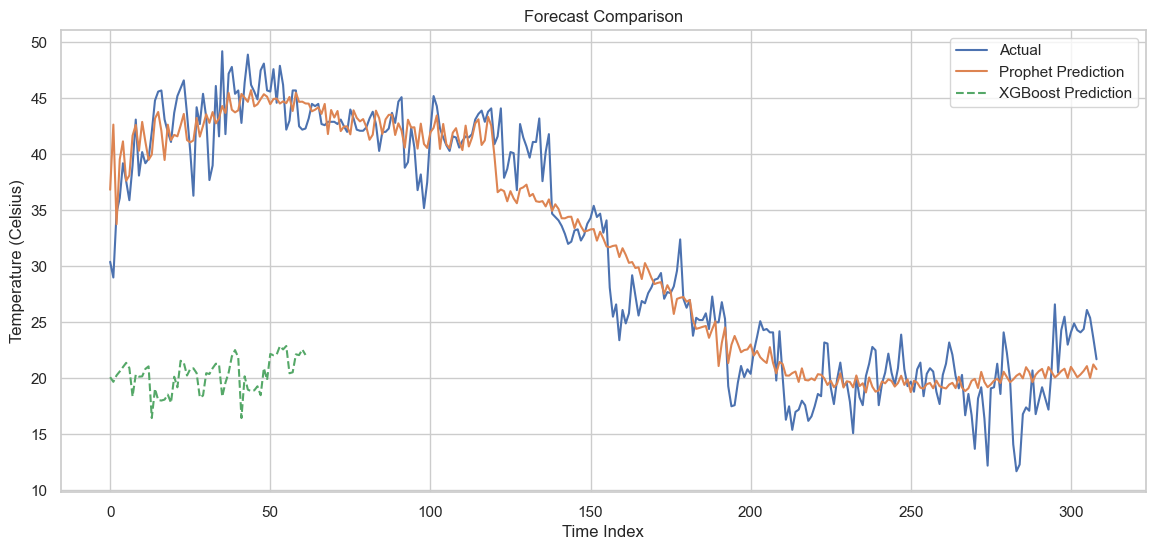

In [378]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(actual.values, label='Actual')
plt.plot(forecast_filtered['yhat'].values, label='Prophet Prediction')
plt.plot(y_pred[:len(actual)], label='XGBoost Prediction', linestyle='--')
plt.legend()
plt.title("Forecast Comparison")
plt.xlabel("Time Index")
plt.ylabel("Temperature (Celsius)")
plt.show()


# 03 Summary and Conclusion

## Project Objective
The goal of this project was to explore global weather data and build predictive models to forecast temperature patterns using both classical and machine learning approaches.

## Key Steps Taken
- **Data Cleaning**: Checked for missing values, converted timestamps, and removed irrelevant columns.
- **Exploratory Analysis**: Visualized temperature distributions and identified outliers.
- **Modeling**:
  - Used **Facebook Prophet** for time series forecasting.
  - Built an **XGBoost Regressor** using extracted datetime features.
- **Evaluation**:
  - Prophet MAE: 2.21  
  - XGBoost MAE: 2.64  
  - Prophet slightly outperformed XGBoost for this specific dataset.

## Insights
- Seasonality is clearly visible in the Prophet forecast.
- XGBoost captured general trends well, but Prophet adapted better to temporal structure.
- Kuwait City showed consistent high temperatures, with occasional outliers worth monitoring.

## Final Thoughts
This project showcased how different modeling approaches perform on weather data. While Prophet is great for time series trends, tree-based models like XGBoost can still offer valuable insights with engineered features.
